In [1]:
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from datetime import datetime

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates=['Month'],
                  index_col='Month', date_parser=dateparse)
ts = base['#Passengers']

In [21]:
ts.index.max()

Timestamp('1960-12-01 00:00:00')

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

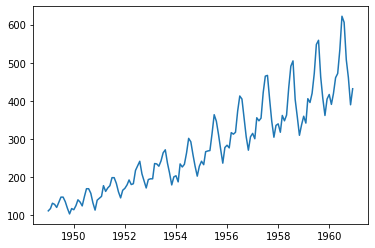

In [3]:
plt.plot(ts)

Criação do modelo ARIMA com parâmetro p = 2, q = 1, d = 2

In [20]:
modelo = ARIMA(ts, order=(2,1,2),freq=ts.index.inferred_freq)
modelo_treinado = modelo.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.714
Date:                Tue, 08 Jun 2021   AIC                           1344.043
Time:                        13:27:06   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5311      0.708      3.573      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.931      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.879      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9098      0.065    -29.483      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9996      0.068     14.794      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9060           -0.5281j            1.0486           -0.0840
AR.2            0.9060           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2965j            1.0002           -0.0479
MA.2            0.9552           +0.2965j            1.0002            0.0479
-----------------------------------------------------------------------------
"""

In [14]:
previsoes = modelo_treinado.forecast(steps=12)[0]
previsoes

array([433.12524774, 450.90100242, 479.82912881, 511.99144103,
       539.34102725, 555.81960766, 558.76262721, 549.28895193,
       531.66521453, 511.90406791, 496.03257873, 488.51377613])

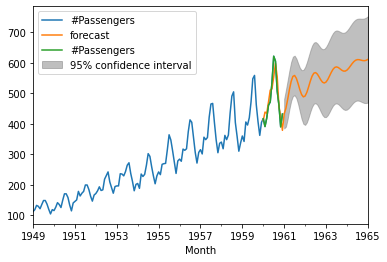

In [23]:
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01', '1965-01-01',
                             ax=eixo, plot_insample=True)
pass;

In [16]:
modelo_auto = auto_arima(ts, m=12, seasonal=True, trace=False)
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Tue, 08 Jun 2021   AIC                           1017.847
Time:                                     11:32:18   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.602      0.000      -1.057      -0.907
sigma2       129.3148     14.557      8.883      0.000     100.784     157.846
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
proximos_12 = modelo_auto.predict(n_periods=12)

In [27]:
proximos_12

array([445.63531446, 420.39561908, 449.19912713, 491.84089352,
       503.39552624, 566.86357464, 654.2613524 , 638.59869948,
       540.8849756 , 494.12786715, 423.33396039, 465.50882743])